# MCoRec-Baseline mit Light-ASD vs. Light-Robust-ASD

In der MCoRec-Baseline ist das [Light-ASD-Modell](https://github.com/Junhua-Liao/Light-ASD) von Junhua Liao implementiert. Mittlerweile gibt es eine neuere Version von diesem Modell, das [Light-Robust-ASD (LR-ASD)](https://github.com/Junhua-Liao/LR-ASD). Inwiefern die neuere Version Auswirkungen auf die Ergebnisse der MCoRec-Baseline hat, soll in diesem Notebook analysiert werden. Hierzu wird die Baseline auf dem bereitgestellten Testdatensatz mit dem MCoRec-fintuned AVSR-Modell *AV-HuBERT CTC/Attention* ausgeführt und evaluiert werden. 

**Hinweis:** Es werden die schon vorhandenen ASD-Scores verwendet, die mit der Baseline mitgeliefert wurden. Diese werden mittels `inference.py` nicht automatisch neu berechnet und müssen manuell aktualisiert werden!

## Imports

In [1]:
import os
import time
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_elapsed_time(start, end):
    elapsed_time = end - start

    # Berechnung der Minuten und Sekunden
    minutes = int((elapsed_time % 3600) // 60)
    seconds = elapsed_time % 60
    
    print(f"Laufzeit: {minutes} Minuten und {seconds:.2f} Sekunden")

In [3]:
project_baseline_path = ""
project_baseline_path_lrasd = ""
notebook_path = ""

# ASD-System

## 1. MCoRec-Baseline mit Light-ASD-Modell

In [ ]:
os.chdir(project_baseline_path)
print(os.getcwd())

sessions = os.listdir("data-bin/dev")
print(sessions)

In [ ]:
start = time.time()

for session in sessions[15:]:

    print(session)
    session_speakers_path = f"data-bin/dev/{session}/speakers"
    pattern = re.compile(r'^track_\d{2}\.mp4$')
    
    for speaker in os.listdir(session_speakers_path):
    
        print(speaker)
        speaker_files = os.listdir(f"{session_speakers_path}/{speaker}/central_crops")
        speaker_tracks = [file for file in speaker_files if pattern.match(file)]
    
        for track in speaker_tracks:
    
            print(track)
            !conda run -n mcorec python script/asd.py --video {session_speakers_path}/{speaker}/central_crops/{track}

end = time.time()

display_elapsed_time(start, end)

## 2. MCoRec-Baseline mit Light-Robust-ASD-Modell

In [ ]:
os.chdir(project_baseline_path_lrasd)
print(os.getcwd())

sessions = os.listdir("data-bin/dev")
print(sessions)

In [ ]:
start = time.time()

for session in sessions:

    print(session)
    session_speakers_path = f"data-bin/dev/{session}/speakers"
    pattern = re.compile(r'^track_\d{2}\.mp4$')
    
    for speaker in os.listdir(session_speakers_path):
    
        print(speaker)
        speaker_files = os.listdir(f"{session_speakers_path}/{speaker}/central_crops")
        speaker_tracks = [file for file in speaker_files if pattern.match(file)]
    
        for track in speaker_tracks:
    
            print(track)
            !conda run -n mcorec python script/asd.py --video {session_speakers_path}/{speaker}/central_crops/{track}

end = time.time()

display_elapsed_time(start, end)

# Gesamtsystem

## 1. MCoRec-Baseline mit Light-ASD-Modell

In [ ]:
os.chdir(project_baseline_path)
print(os.getcwd())

sessions = os.listdir("data-bin/dev")
print(sessions)

In [ ]:
for session in sessions:
    print(session)
    
    start = time.time()

    !conda run -n mcorec python script/inference.py --model_type avsr_cocktail --session_dir data-bin/dev/{session} \
        --checkpoint_path ./model-bin/avsr_cocktail_mcorec_finetune \
        --beam_size 3 --max_length 15 \
        --output_dir_name output_avsr_cocktail_finetuned
    
    end = time.time()
    
    display_elapsed_time(start, end)
    print("\n", "\n")

In [ ]:
for session in sessions:

    print(session)

    start = time.time()

    !conda run -n mcorec python script/evaluate.py --session_dir data-bin/dev/{session} --output_dir_name output_avsr_cocktail_finetuned --label_dir_name labels

    end = time.time()

    display_elapsed_time(start, end)
    print("\n", "\n")

## 2. MCoRec-Baseline mit Light-Robust-ASD-Modell

In [ ]:
os.chdir(project_baseline_path_lrasd)
print(os.getcwd())

sessions = os.listdir("data-bin/dev")
print(sessions)

In [ ]:
for session in sessions:
    print(session)
    
    start = time.time()

    !conda run -n mcorec python script/inference.py --model_type avsr_cocktail --session_dir data-bin/dev/{session} \
        --checkpoint_path ./model-bin/avsr_cocktail_mcorec_finetune \
        --beam_size 3 --max_length 15 \
        --output_dir_name output_avsr_cocktail_finetuned
    
    end = time.time()
    
    display_elapsed_time(start, end)
    print("\n", "\n")

In [ ]:
for session in sessions:

    print(session)

    start = time.time()

    !conda run -n mcorec python script/evaluate.py --session_dir data-bin/dev/{session} --output_dir_name output_avsr_cocktail_finetuned --label_dir_name labels

    end = time.time()

    display_elapsed_time(start, end)
    print("\n", "\n")

## Vergleich

### L-ASD:
  
**Evaluating session session_57:**
- Conversation clustering F1 score: 1.0
- Speaker to WER: {'spk_0': 0.34, 'spk_1': 0.3394, 'spk_2': 0.4618, 'spk_3': 0.5328, 'spk_4': 0.5087}
- Speaker clustering F1 score: {'spk_0': 1.0, 'spk_1': 1.0, 'spk_2': 1.0, 'spk_3': 1.0, 'spk_4': 1.0}
- Joint ASR-Clustering Error Rate: {'spk_0': 0.17, 'spk_1': 0.1697, 'spk_2': 0.2309, 'spk_3': 0.2664, 'spk_4': 0.25435}
- Average Conversation Clustering F1 score: 1.0
- Average Speaker WER: 0.43654000000000004
- Average Joint ASR-Clustering Error Rate: 0.21827000000000002


### LR-ASD:

**Evaluating session session_57:**
- Conversation clustering F1 score: 0.5
- Speaker to WER: {'spk_0': 0.34, 'spk_1': 0.4224, 'spk_2': 0.4585, 'spk_3': 0.5779, 'spk_4': 0.5196}
- Speaker clustering F1 score: {'spk_0': 0.6667, 'spk_1': 0.6667, 'spk_2': 0.0, 'spk_3': 0.6667, 'spk_4': 0.6667}
- Joint ASR-Clustering Error Rate: {'spk_0': 0.33665, 'spk_1': 0.37785, 'spk_2': 0.72925, 'spk_3': 0.4556, 'spk_4': 0.42645}
- Average Conversation Clustering F1 score: 0.5
- Average Speaker WER: 0.46368
- Average Joint ASR-Clustering Error Rate: 0.46516

In [ ]:
os.chdir(notebook_path)
print(os.getcwd())

In [34]:
df = pd.read_csv("L-ASD_vs_LR-ASD.csv", sep=";")
df

,session,L-ASD_F1,L-ASD_WER,L-ASD_ASR-CER,LR-ASD_F1,LR-ASD_WER,LR-ASD_ASR-CER
0,40,1.000000,0.484283,0.242142,1.000000,0.509267,0.254633
1,41,1.000000,0.468517,0.234258,1.000000,0.471133,0.235567
2,42,1.000000,0.524100,0.262050,1.000000,0.556000,0.278000
3,43,1.000000,0.476217,0.238108,1.000000,0.524050,0.262025
4,44,0.600000,0.565433,0.449383,1.000000,0.565900,0.282950
5,48,1.000000,0.501000,0.417167,0.500000,0.554833,0.555183
6,49,1.000000,0.439733,0.219867,0.615385,0.472583,0.425175
7,50,0.571429,0.537933,0.483267,0.571429,0.542517,0.485558
8,51,1.000000,0.461983,0.230992,0.615385,0.469133,0.423450
9,52,0.500000,0.508117,0.531833,0.333333,0.513700,0.590183


Mittelwerte
F1-Score: 
	L-ASD: 0.8152820512820513
	LR-ASD: 0.8178021978021978
Word Error Rate: 
	L-ASD: 0.49984966666666664
	LR-ASD: 0.527605
Joint ASR-Clustering Error Rate: 
	L-ASD: 0.3567565
	LR-ASD: 0.36041096666666667


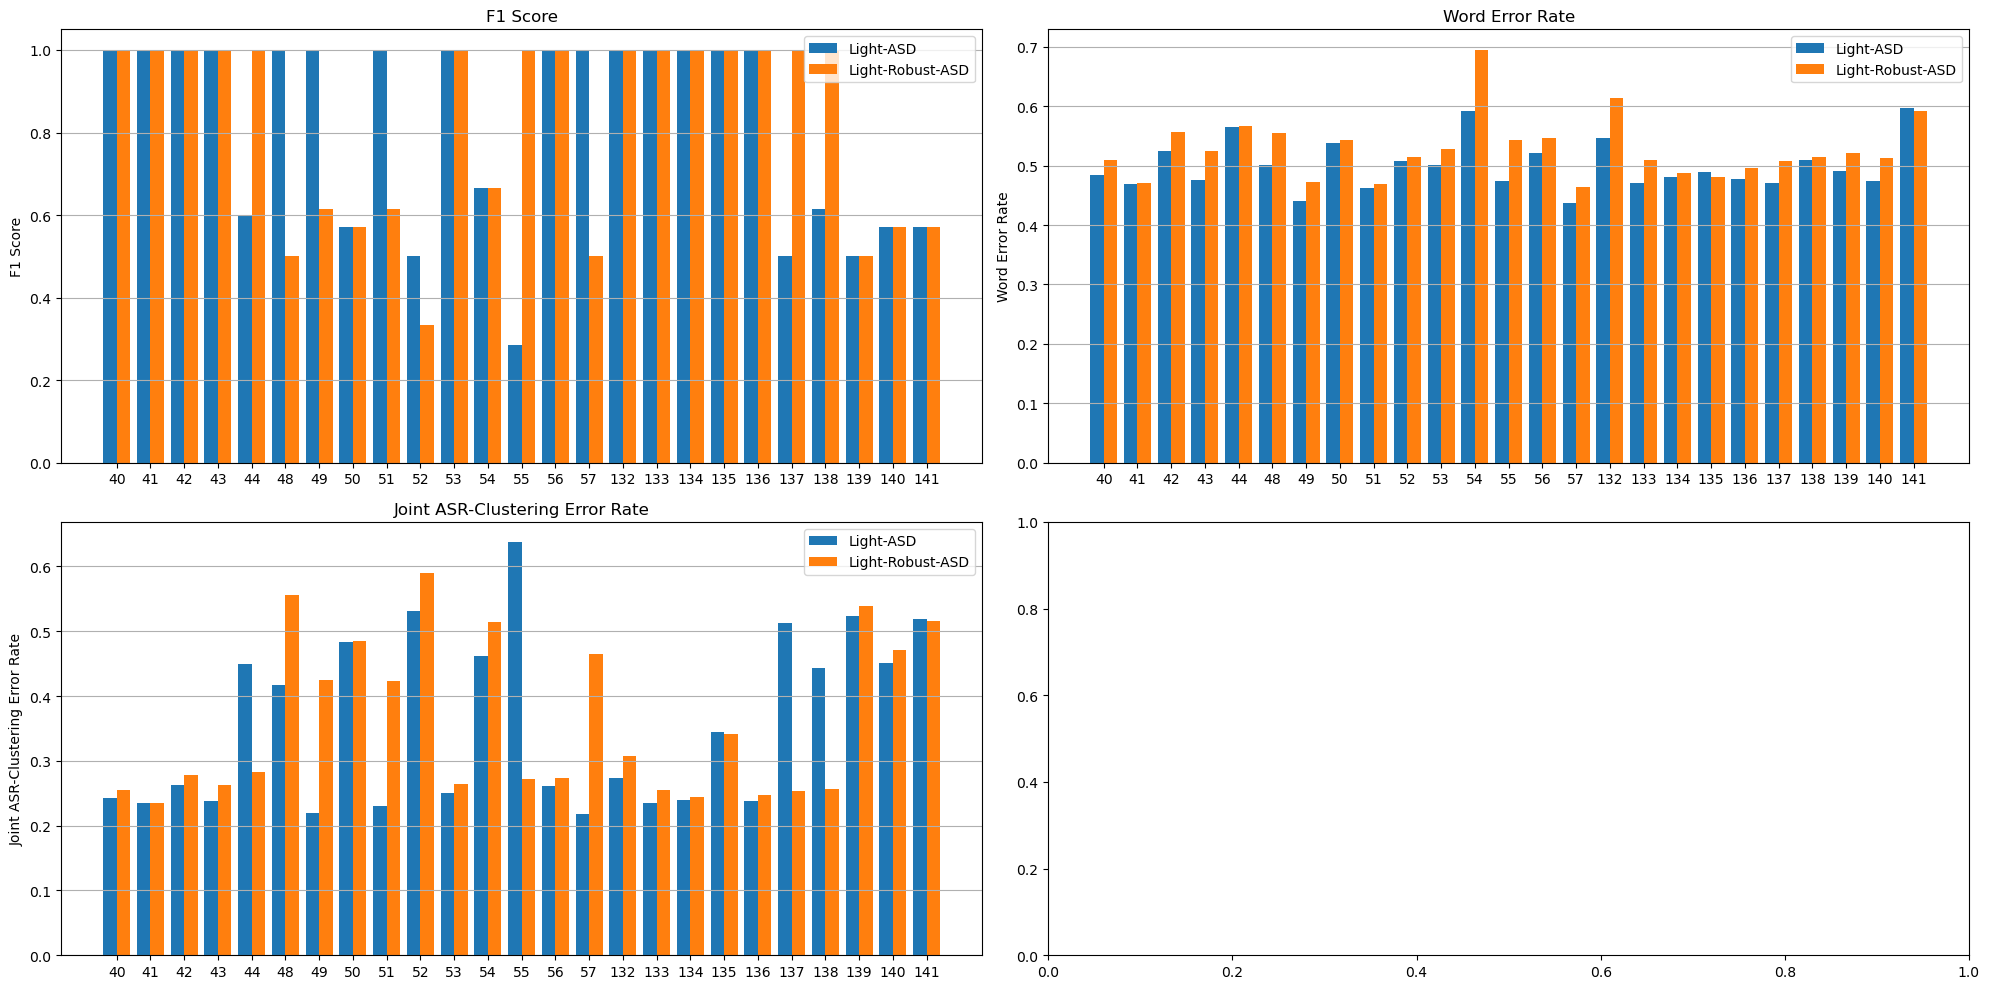

In [76]:
# Mittelwerte
print("Mittelwerte")
print(f"F1-Score: \n\tL-ASD: {df['L-ASD_F1'].mean()}\n\tLR-ASD: {df['LR-ASD_F1'].mean()}")
print(f"Word Error Rate: \n\tL-ASD: {df['L-ASD_WER'].mean()}\n\tLR-ASD: {df['LR-ASD_WER'].mean()}")
print(f"Joint ASR-Clustering Error Rate: \n\tL-ASD: {df['L-ASD_ASR-CER'].mean()}\n\tLR-ASD: {df['LR-ASD_ASR-CER'].mean()}")

# Erstellen von Subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))  # 3 Zeilen, 1 Spalte

bar_width = 0.4
x = np.arange(len(df))

# 1. Plot für F1
axs[0, 0].bar(x - bar_width/2, df['L-ASD_F1'], width=bar_width, label='Light-ASD')
axs[0, 0].bar(x + bar_width/2, df['LR-ASD_F1'], width=bar_width, label='Light-Robust-ASD')
axs[0, 0].set_ylabel('F1 Score')
axs[0, 0].set_title('F1 Score')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(df['session'])
axs[0, 0].legend()
axs[0, 0].grid(axis='y')

# 2. Plot für WER
axs[0, 1].bar(x - bar_width/2, df['L-ASD_WER'], width=bar_width, label='Light-ASD')
axs[0, 1].bar(x + bar_width/2, df['LR-ASD_WER'], width=bar_width, label='Light-Robust-ASD')
axs[0, 1].set_ylabel('Word Error Rate')
axs[0, 1].set_title('Word Error Rate')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(df['session'])
axs[0, 1].legend()
axs[0, 1].grid(axis='y')

# 3. Plot für ASR-CER
axs[1, 0].bar(x - bar_width/2, df['L-ASD_ASR-CER'], width=bar_width, label='Light-ASD')
axs[1, 0].bar(x + bar_width/2, df['LR-ASD_ASR-CER'], width=bar_width, label='Light-Robust-ASD')
axs[1, 0].set_ylabel('Joint ASR-Clustering Error Rate')
axs[1, 0].set_title('Joint ASR-Clustering Error Rate')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(df['session'])
axs[1, 0].legend()
axs[1, 0].grid(axis='y')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()